In [1]:
import numpy as np
import pandas as pd
 
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
 
# Prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
 
# Prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
 
# Modèles de Machine Learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
 
# Évaluation des modèles
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    r2_score
)

In [2]:
data = pd.read_csv("economy.csv")

print(data.head(10))

column_nan_count = data.isnull().sum()
print("NaN count per column:")
print(column_nan_count)
# Conversion price et time_taken
if 'price' in data.columns and data['price'].dtype == 'object':
    data['price'] = data['price'].str.replace(',', '').astype(float)
if 'time_taken' in data.columns and data['time_taken'].dtype == 'object':
    data['time_taken'] = data['time_taken'].str.replace('h', '').str.replace('m', '').str.split().apply(lambda x: float(x[0]) + float(x[1])/60 if len(x) == 2 else 0)


         date   airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  SpiceJet      SG      8709    18:55  Delhi    02h 10m   
1  11-02-2022  SpiceJet      SG      8157    06:20  Delhi    02h 20m   
2  11-02-2022   AirAsia      I5       764    04:25  Delhi    02h 10m   
3  11-02-2022   Vistara      UK       995    10:20  Delhi    02h 15m   
4  11-02-2022   Vistara      UK       963    08:50  Delhi    02h 20m   
5  11-02-2022   Vistara      UK       945    11:40  Delhi    02h 20m   
6  11-02-2022   Vistara      UK       927    09:30  Delhi    02h 05m   
7  11-02-2022   Vistara      UK       951    14:20  Delhi    02h 10m   
8  11-02-2022  GO FIRST      G8       334    08:00  Delhi    02h 10m   
9  11-02-2022  GO FIRST      G8       336    14:20  Delhi    02h 15m   

        stop arr_time      to  price  
0  non-stop     21:05  Mumbai  5,953  
1  non-stop     08:40  Mumbai  5,953  
2  non-stop     06:35  Mumbai  5,956  
3  non-stop     12:35  Mumbai  5,955  
4  non-stop 

In [3]:
print(data.describe())

            num_code     time_taken          price
count  206774.000000  206774.000000  206774.000000
mean     1706.096714      11.545673    6571.190701
std      2320.463721       7.242259    3743.442838
min       101.000000       0.000000    1105.000000
25%       588.000000       6.250000    4173.000000
50%       818.000000      10.166667    5772.000000
75%       960.000000      15.250000    7746.000000
max      9991.000000      49.833333   42349.000000


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        206774 non-null  object 
 1   airline     206774 non-null  object 
 2   ch_code     206774 non-null  object 
 3   num_code    206774 non-null  int64  
 4   dep_time    206774 non-null  object 
 5   from        206774 non-null  object 
 6   time_taken  206774 non-null  float64
 7   stop        206774 non-null  object 
 8   arr_time    206774 non-null  object 
 9   to          206774 non-null  object 
 10  price       206774 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 17.4+ MB
None


# Colonnes :
    - Unnamed: index, int (TO DELETE)
    - airline : nom compagnie aérienne, char (TO DELETE)
    - ch_code', 'num_code : numéro de vol, char composé de chiffres et de lettres "ex : AA1234" (TO DELETE)
    - source_city : aéroport de départ, char
    - departure_time : heure de départ, char ("Early_Morning", "Morning", "Afternoon", "Evening", "Night")
    - stop : nombre d'escales, int
    - arrival_time : heure d'arrivée, char ("Early_Morning", "Morning", "Afternoon", "Evening", "Night")
    - destination_city : aéroport d'arrivée, char
    - class : classe de voyage, char ("Business", "Economy", "Economy Plus")
    - time_taken : durée du vol en minutes, flot
    - price : nombre de jours avant le départ, int
    - price : prix du billet, int = dollars

In [5]:
df = data.drop(columns=['date'], inplace=False)
df = df.drop(columns=['ch_code', 'num_code'], inplace=False)
df = df.drop(columns=['airline'], inplace=False)

## Duplicates et valeurs manquantes

In [6]:
duplicate_count = df.duplicated().sum()
missing_values = df.isnull().sum()
print(f"Nombre de doublons : {duplicate_count}")
print("Valeurs manquantes par colonne :")
print(missing_values)

Nombre de doublons : 148670
Valeurs manquantes par colonne :
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64


### Grape pour voir les données aberrantes et la distribution des données

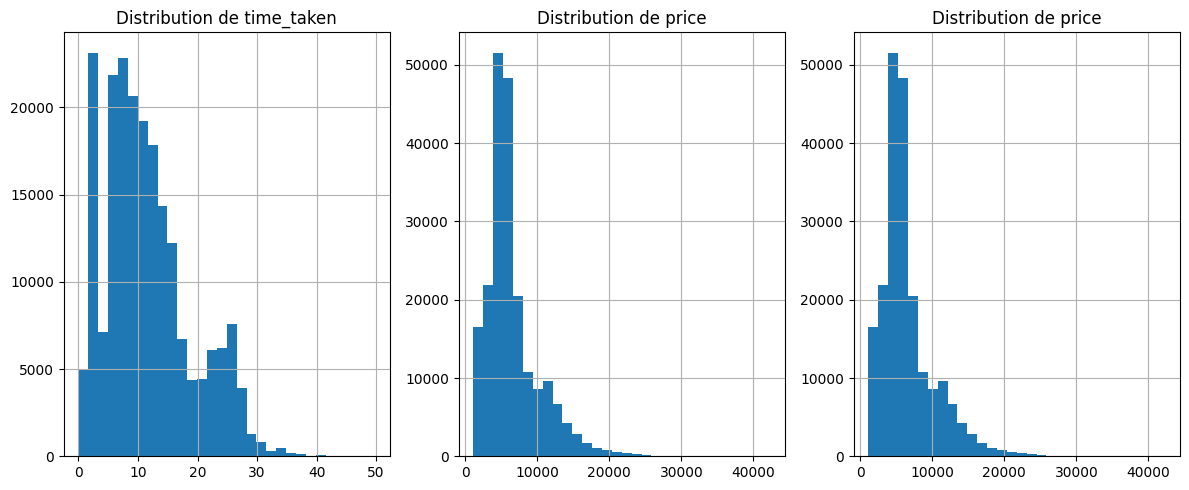

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
df.hist(column='time_taken', bins=30, ax=axes[0])
df.hist(column='price', bins=30, ax=axes[1])
df.hist(column='price', bins=30, ax=axes[2])
axes[0].set_title('Distribution de time_taken')
axes[1].set_title('Distribution de price')
axes[2].set_title('Distribution de price')
plt.tight_layout()
plt.show()

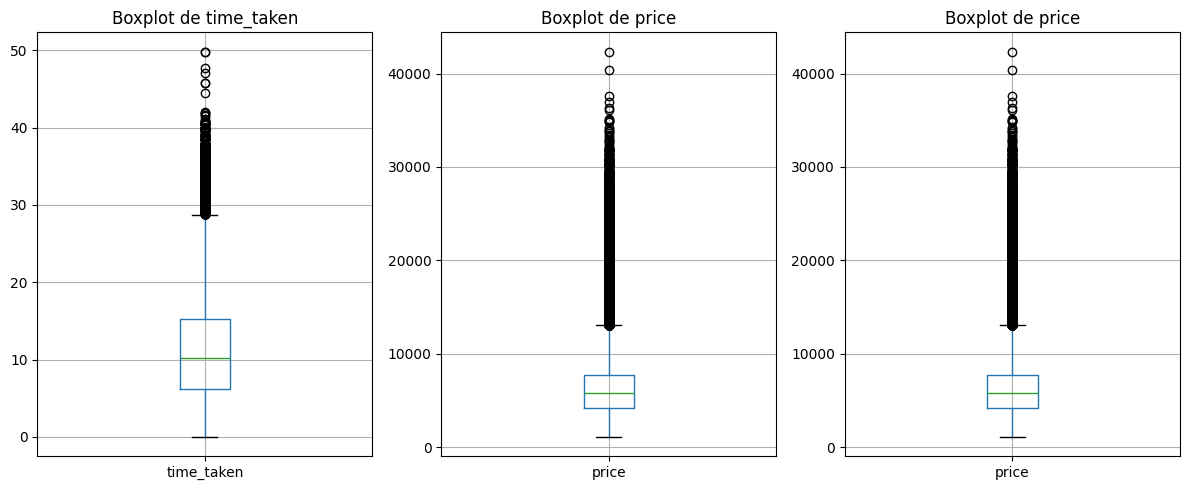

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
df.boxplot(column='time_taken', ax=axes[0])
df.boxplot(column='price', ax=axes[1])
df.boxplot(column='price', ax=axes[2])
axes[0].set_title('Boxplot de time_taken')
axes[1].set_title('Boxplot de price') 
axes[2].set_title('Boxplot de price') 
plt.tight_layout()
plt.show()

/tmp/ipykernel_89/1904060714.py:8: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


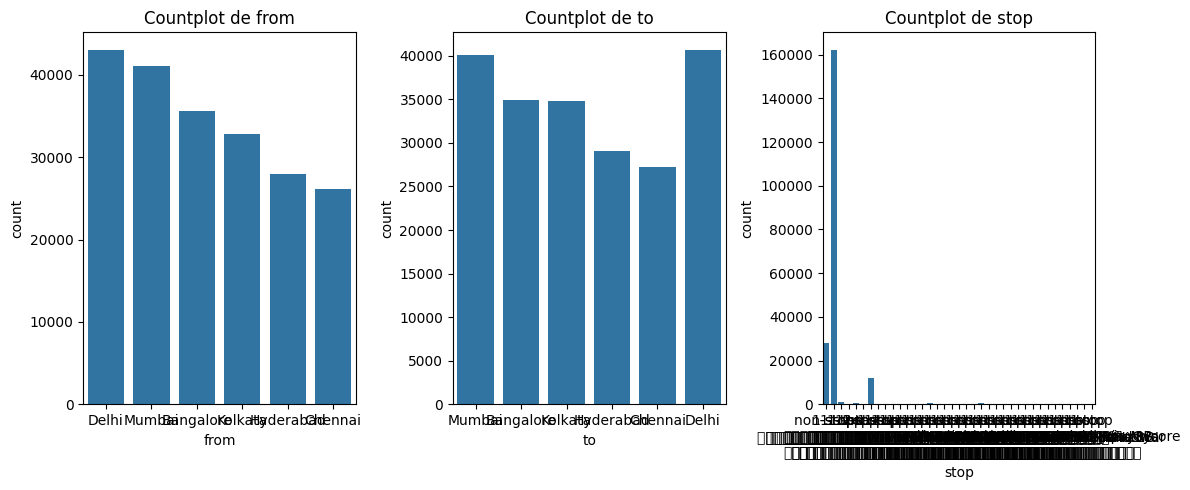

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.countplot(x=df['from'], ax=axes[0])
axes[0].set_title('Countplot de from')
sns.countplot(x=df['to'], ax=axes[1])
axes[1].set_title('Countplot de to')
sns.countplot(x=df['stop'], ax=axes[2])
axes[2].set_title('Countplot de stop')
plt.tight_layout()
plt.show()